# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [2]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv("rym_top5000.csv")

In [4]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [14]:
aggDf = df.groupby("Artist Name").agg(median=('Average Rating', 'median'), albumCount=('Ranking', 'count')).reset_index()
aggDf.loc[aggDf.albumCount > 5].sort_values("albumCount", ascending=False)[["Artist Name",'median']].head(10).reset_index()

,Artist Name,median
2560,Various Artists,3.780
1502,Miles Davis,3.840
1124,John Coltrane,3.905
2490,Tom Waits,3.810
1142,John Williams,3.780
276,Bob Dylan,3.890
2233,The Beatles,4.045
973,Herbie Hancock,3.780
722,Ennio Morricone,3.880
2288,The Fall,3.760


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [19]:
rateDf = df.groupby("Artist Name").agg(minRate = ("Average Rating", "min"),
                                       maxRate = ("Average Rating", "max")).reset_index()
rateDf["diffRate"] = rateDf["maxRate"] - rateDf["minRate"]
rateDf.sort_values("diffRate", ascending=False)[["Artist Name", "maxRate","minRate"]].head(10).reset_index()

,index,Artist Name,maxRate,minRate
0,1213,Kendrick Lamar,4.27,3.52
1,2233,The Beatles,4.25,3.55
2,1782,Pink Floyd,4.29,3.60
3,1562,My Bloody Valentine,4.24,3.58
4,1228,King Crimson,4.30,3.67
5,1124,John Coltrane,4.30,3.70
6,1844,Radiohead,4.23,3.66
7,1502,Miles Davis,4.23,3.69
8,2266,The Cure,4.17,3.63
9,1197,Kanye West,4.07,3.54


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [35]:
alDf = df.loc[df["Number of Reviews"] > 15].loc[df['Number of Ratings'].str.replace(',','').astype(int) > 5000]
alDf["rateRevRatio"] =  alDf["Number of Reviews"]/alDf['Number of Ratings'].str.replace(',','').astype(int)
alDf.sort_values("rateRevRatio", ascending=False).head(10)["Album"].reset_index()

,index,Album
0,1405,Trout Mask Replica
1,4426,Appetite for Destruction
2,3978,Never Mind the Bollocks Here's the Sex Pistols
3,1322,Smile
4,3751,Boston
5,4276,Back in Black
6,1694,Blizzard of Ozz
7,1230,Layla and Other Assorted Love Songs
8,1506,Van Halen
9,2440,Watershed


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [42]:
q3rDf = df.loc[df['Number of Reviews'] > df['Number of Reviews'].quantile(0.75),]
q3rDf["year"] = q3rDf["Release Date"].str[-4:]
q3rDf.groupby(by = 'year').count().reset_index().sort_values("Album", ascending=False)["year"].head(5)

/tmp/ipykernel_56123/2680253865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3rDf["year"] = q3rDf["Release Date"].str[-4:]


13    1970
14    1971
12    1969
37    1994
38    1995
Name: year, dtype: object

In [48]:
q3rDf = df.loc[df['Number of Ratings'].str.replace(',','').astype(int) >
               df['Number of Ratings'].str.replace(',','').astype(int).quantile(0.75),]
q3rDf["year"] = q3rDf["Release Date"].str[-4:]
q3rDf.groupby(by = 'year').count().reset_index().sort_values("Album", ascending=False)["year"].head(5)

/tmp/ipykernel_56123/839123132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3rDf["year"] = q3rDf["Release Date"].str[-4:]


37    1994
14    1971
13    1970
39    1996
38    1995
Name: year, dtype: object

## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',','').astype(int)

In [70]:
alDf = df.loc[df["Number of Reviews"] > 15].loc[df['Number of Ratings'] > 5000]
alDf["rateRevRatio"] =  alDf["Number of Reviews"]/alDf['Number of Ratings']
alDf = alDf.sort_values("rateRevRatio", ascending=False).head(10).reset_index()
alDf

,index,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,rateRevRatio
0,1405,1406.0,Trout Mask Replica,Captain Beefheart & His Magic Band,16 June 1969,Experimental Rock,"uncommon time signatures, surreal, humorous, m...",3.67,15953,651,0.040807
1,4426,4427.0,Appetite for Destruction,Guns n' Roses,21 July 1987,Hard Rock,"energetic, sexual, drugs, male vocals, hedonis...",3.52,16526,614,0.037154
2,3978,3979.0,Never Mind the Bollocks Here's the Sex Pistols,Sex Pistols,28 October 1977,Punk Rock,"rebellious, male vocals, sarcastic, energetic,...",3.57,16117,593,0.036793
3,1322,1323.0,Smile,Brian Wilson,28 September 2004,"Psychedelic Pop, Baroque Pop, Progressive Pop","Wall of Sound, melodic, psychedelic, lush, poe...",3.78,5839,213,0.036479
4,3751,3752.0,Boston,Boston,25 August 1976,"Hard Rock, AOR","energetic, melodic, male vocals, uplifting, ha...",3.63,6914,246,0.035580
5,4276,4277.0,Back in Black,AC/DC,18 August 1980,Hard Rock,"energetic, male vocals, sexual, rhythmic, raw,...",3.54,15828,563,0.035570
6,1694,1695.0,Blizzard of Ozz,Ozzy Osbourne,September 1980,"Heavy Metal, Hard Rock","male vocals, anthemic, energetic, occult, melo...",3.75,6836,233,0.034084
7,1230,1231.0,Layla and Other Assorted Love Songs,Derek and The Dominos,9 November 1970,Blues Rock,"passionate, romantic, bittersweet, male vocals...",3.79,6211,207,0.033328
8,1506,1507.0,Van Halen,Van Halen,6 February 1978,Hard Rock,"energetic, male vocals, sexual, playful, melod...",3.73,8952,296,0.033065
9,2440,2441.0,Watershed,Opeth,3 June 2008,Progressive Metal,"complex, progressive, male vocals, sombre, mel...",3.69,7208,237,0.032880


/tmp/ipykernel_56123/2328488521.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(alDf['Album'], rotation=30, ha='right')


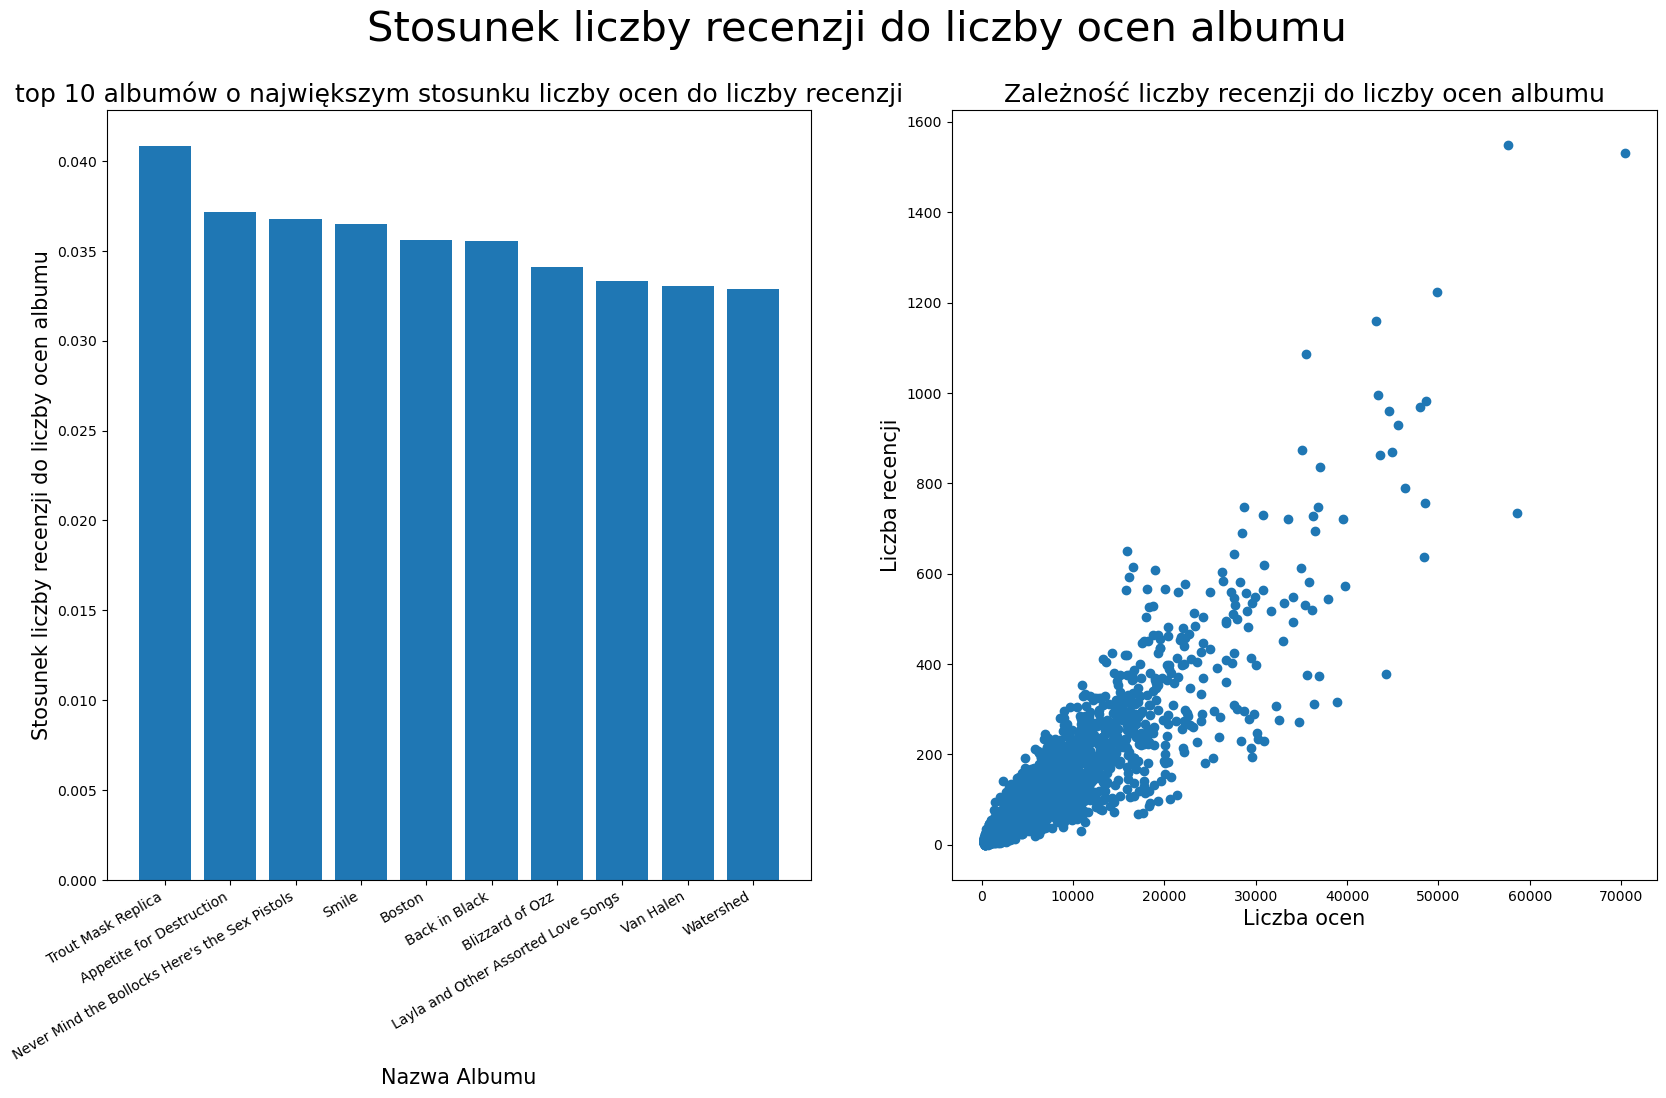

In [107]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1,2)

fig.suptitle('Stosunek liczby recenzji do liczby ocen albumu', fontsize=30)

ax[0].bar(alDf['Album'],alDf['rateRevRatio'])
ax[0].set_title('top 10 albumów o największym stosunku liczby ocen do liczby recenzji', fontsize=18)
ax[0].set_xlabel('Nazwa Albumu', fontsize=15)
ax[0].set_ylabel('Stosunek liczby recenzji do liczby ocen albumu', fontsize=15)
ax[0].set_xticklabels(alDf['Album'], rotation=30, ha='right')


ax[1].scatter(df['Number of Ratings'],df['Number of Reviews'])
ax[1].set_title('Zależność liczby recenzji do liczby ocen albumu', fontsize=18)
ax[1].set_xlabel('Liczba ocen', fontsize=15)
ax[1].set_ylabel('Liczba recencji', fontsize=15)

fig.subplots_adjust(hspace=0.35)

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 